In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('C:/Users/Dell/Desktop/Assignments/Neural Networks/gas_turbines.csv')

In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

# Univariate Analysis

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

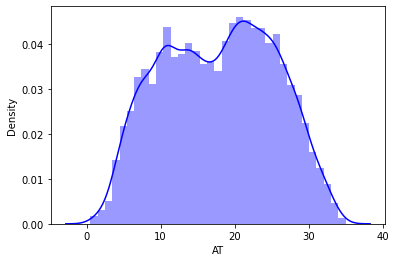

In [9]:
sns.distplot(data['AT'],color='blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AP', ylabel='Density'>

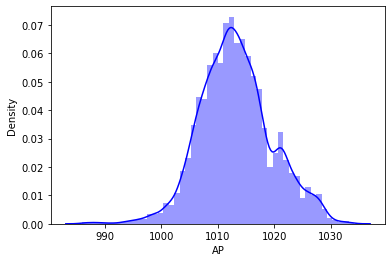

In [10]:
sns.distplot(data['AP'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AH', ylabel='Density'>

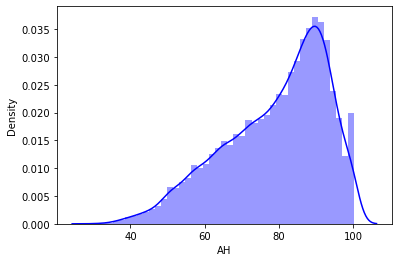

In [11]:
sns.distplot(data['AH'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AFDP', ylabel='Density'>

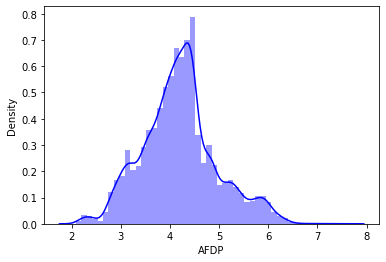

In [12]:
sns.distplot(data['AFDP'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GTEP', ylabel='Density'>

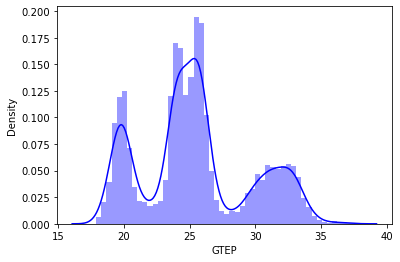

In [13]:
sns.distplot(data['GTEP'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TIT', ylabel='Density'>

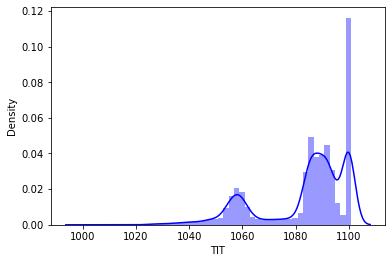

In [14]:
sns.distplot(data['TIT'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAT', ylabel='Density'>

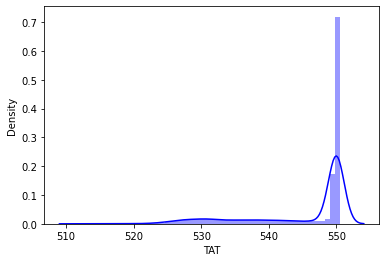

In [15]:
sns.distplot(data['TAT'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TEY', ylabel='Density'>

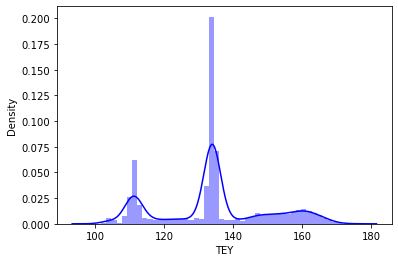

In [16]:
sns.distplot(data['TEY'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CDP', ylabel='Density'>

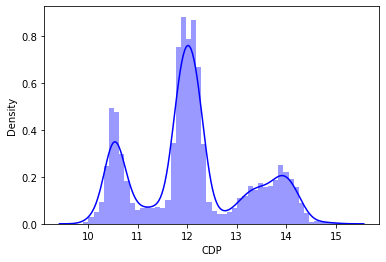

In [17]:
sns.distplot(data['CDP'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO', ylabel='Density'>

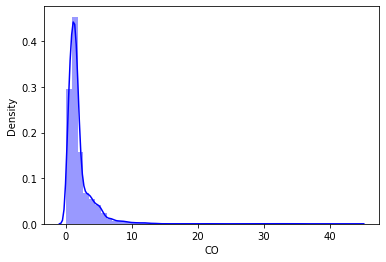

In [18]:
sns.distplot(data['CO'], color = 'blue')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOX', ylabel='Density'>

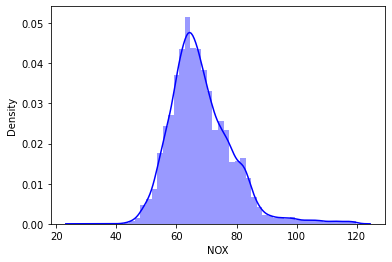

In [19]:
sns.distplot(data['NOX'], color = 'blue')

# Bivariate Analysis

<AxesSubplot:xlabel='AT', ylabel='TEY'>

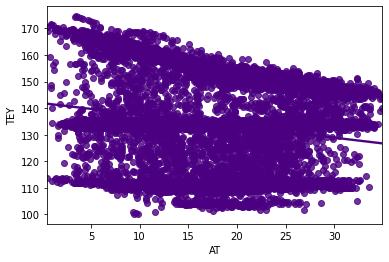

In [20]:
sns.regplot(x = 'AT', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='AP', ylabel='TEY'>

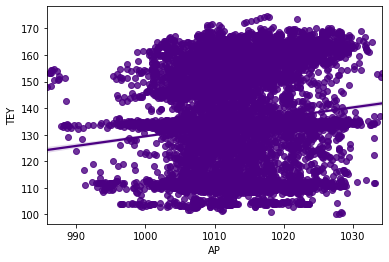

In [21]:
sns.regplot(x = 'AP', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='AH', ylabel='TEY'>

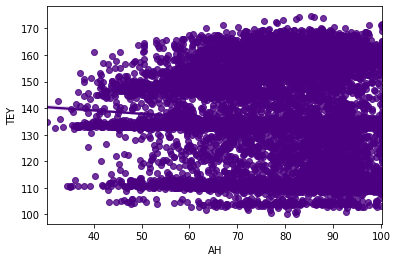

In [22]:
sns.regplot(x = 'AH', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='AFDP', ylabel='TEY'>

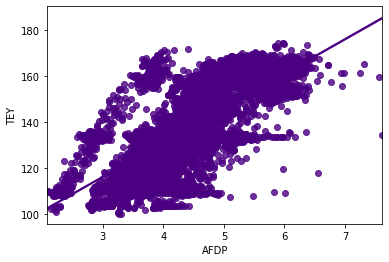

In [23]:
sns.regplot(x = 'AFDP', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='GTEP', ylabel='TEY'>

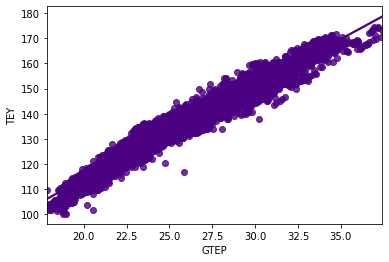

In [24]:
sns.regplot(x = 'GTEP', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='TIT', ylabel='TEY'>

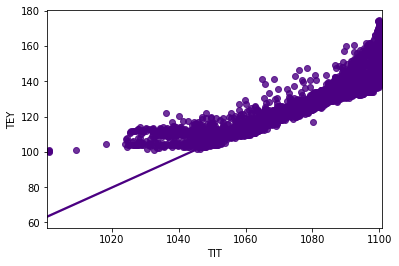

In [25]:
sns.regplot(x = 'TIT', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='TAT', ylabel='TEY'>

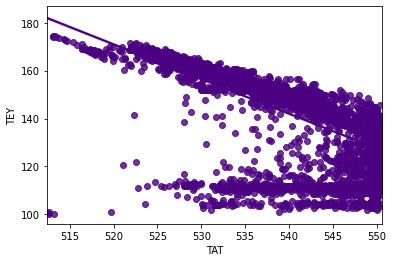

In [26]:
sns.regplot(x = 'TAT', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

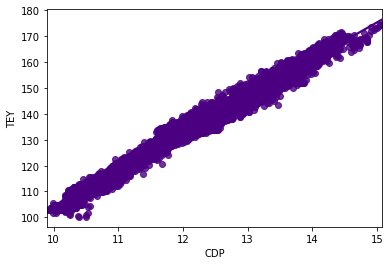

In [27]:
sns.regplot(x = 'CDP', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='CO', ylabel='TEY'>

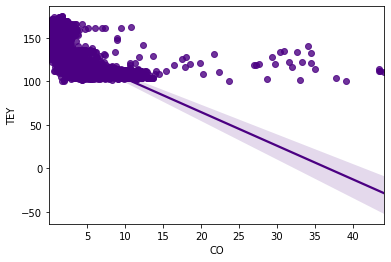

In [28]:
sns.regplot(x = 'CO', y = 'TEY', data = data, color = 'indigo')

<AxesSubplot:xlabel='NOX', ylabel='TEY'>

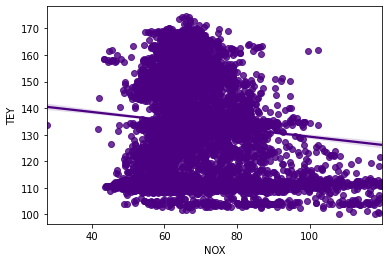

In [29]:
sns.regplot(x = 'NOX', y = 'TEY', data = data, color = 'indigo')

In [30]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

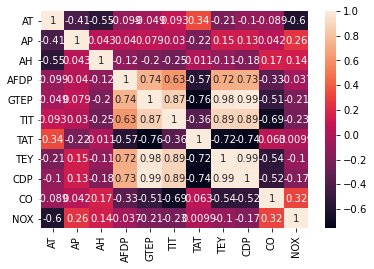

In [31]:
sns.heatmap(data.corr(), annot = True)

In [32]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [33]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [35]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [36]:
y.head()

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72


In [37]:
#K-Fold Cross Validation
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [38]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [39]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.11 (0.10) MSE


In [40]:
estimator.fit(X, y)
prediction = estimator.predict(X)

In [41]:
prediction

array([-1.356227 , -1.3447808, -1.3191487, ..., -1.3631909, -1.3302872,
       -1.3459897], dtype=float32)

In [42]:
a = scaler.inverse_transform(prediction)

In [43]:
b = scaler.inverse_transform(y)

In [44]:
mean_squared_error(b,a)

35.020817485554296

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [46]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [47]:
prediction

array([-0.30486292,  0.36010534,  0.3915257 , ..., -0.14138706,
        0.46766922,  0.52415305], dtype=float32)

In [48]:
c = scaler.inverse_transform(prediction)
d = scaler.inverse_transform(y_test)

In [49]:
mean_squared_error(d,c)

131.33272854751186